In [ ]:
pip install pandas requests

In [3]:
pip install -r /workspaces/web-scraping-project-tutorial/requirements.txt 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install lxml

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
####### all imports ########
import pandas as pd
import requests
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns


In [2]:
####### Web Scrapping #######

#Storing URL
tesla_url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

#Creating request
time.sleep(20) #20 sec delay before making the request not to overload the server
try:
    response = requests.get(tesla_url)
    response.raise_for_status() #Verify if solicitude was successful
    tesla_raw = BeautifulSoup(response.text, 'html')
#handles errors specific to the request

except requests.exceptions.RequestException as e:
    print(f"Requests Exception: {e}")  #for the error
    header = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    response = requests.get(tesla_url, headers = header)
    tesla_raw = BeautifulSoup(response.text, 'html.parser')

#Prints other exceptions that could happen during parsing
except Exception as e:
    print(f"Other Exception: {e}")

Requests Exception: 403 Client Error: Forbidden for url: https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue


In [3]:
#########finding all tables and storing data as#####
all_tables = tesla_raw.find_all("table")

#finding quarterly evolution table of Tesla's revenue

for table in all_tables:
    if 'Tesla Quarterly Revenue' in table.get_text(): 
        tesla_data = table
        break #stops the code once finds a table

#storing result as dataframe

tesla_qrev = pd.read_html(str(tesla_data))[0]
tesla_qrev.columns = ['quarter', 'revenue']#rename columns
tesla_qrev['quarter'] = pd.to_datetime(tesla_qrev['quarter'])
tesla_qrev['revenue'] = tesla_qrev['revenue'].str.replace('[\$,]', '', regex =True)
tesla_qrev = tesla_qrev.dropna(subset=['revenue']) #remove the NaN!

print(tesla_qrev)

      quarter revenue
0  2023-09-30   23350
1  2023-06-30   24927
2  2023-03-31   23329
3  2022-12-31   24318
4  2022-09-30   21454
5  2022-06-30   16934
6  2022-03-31   18756
7  2021-12-31   17719
8  2021-09-30   13757
9  2021-06-30   11958
10 2021-03-31   10389
11 2020-12-31   10744
12 2020-09-30    8771
13 2020-06-30    6036
14 2020-03-31    5985
15 2019-12-31    7384
16 2019-09-30    6303
17 2019-06-30    6350
18 2019-03-31    4541
19 2018-12-31    7226
20 2018-09-30    6824
21 2018-06-30    4002
22 2018-03-31    3409
23 2017-12-31    3288
24 2017-09-30    2985
25 2017-06-30    2790
26 2017-03-31    2696
27 2016-12-31    2285
28 2016-09-30    2298
29 2016-06-30    1270
30 2016-03-31    1147
31 2015-12-31    1214
32 2015-09-30     937
33 2015-06-30     955
34 2015-03-31     940
35 2014-12-31     957
36 2014-09-30     852
37 2014-06-30     769
38 2014-03-31     621
39 2013-12-31     615
40 2013-09-30     431
41 2013-06-30     405
42 2013-03-31     562
43 2012-12-31     306
44 2012-09

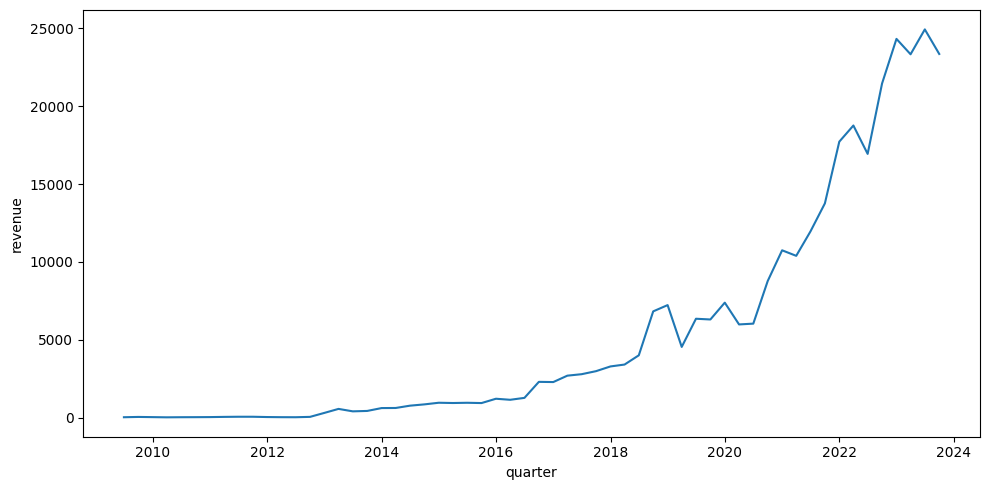

In [4]:
### Time serie visualization

fig, axis = plt.subplots(figsize=(10, 5))

tesla_qrev['quarter'] = pd.to_datetime(tesla_qrev['quarter'])
tesla_qrev['revenue'] = tesla_qrev['revenue'].astype('int')
sns.lineplot(data=tesla_qrev, x='quarter', y='revenue')

plt.tight_layout()

plt.show()

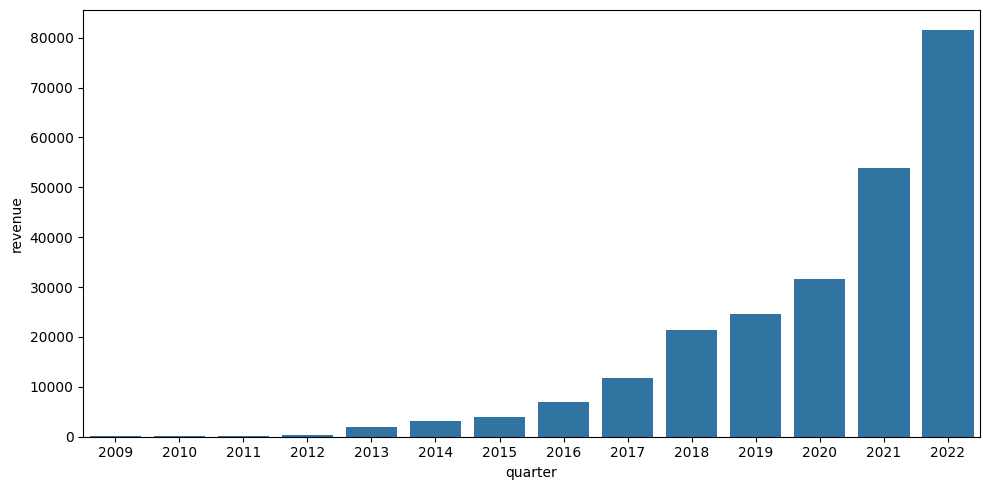

In [5]:
### Anual gross benefit

fig, axis = plt.subplots(figsize=(10, 5))

tesla_qrev['quarter'] = pd.to_datetime(tesla_qrev['quarter'])
tesla_qrev_yearly = tesla_qrev.groupby(tesla_qrev['quarter'].dt.year).sum().reset_index()

sns.barplot(data=tesla_qrev_yearly[tesla_qrev_yearly['quarter'] < 2023], x='quarter', y='revenue')

plt.tight_layout()

plt.show()

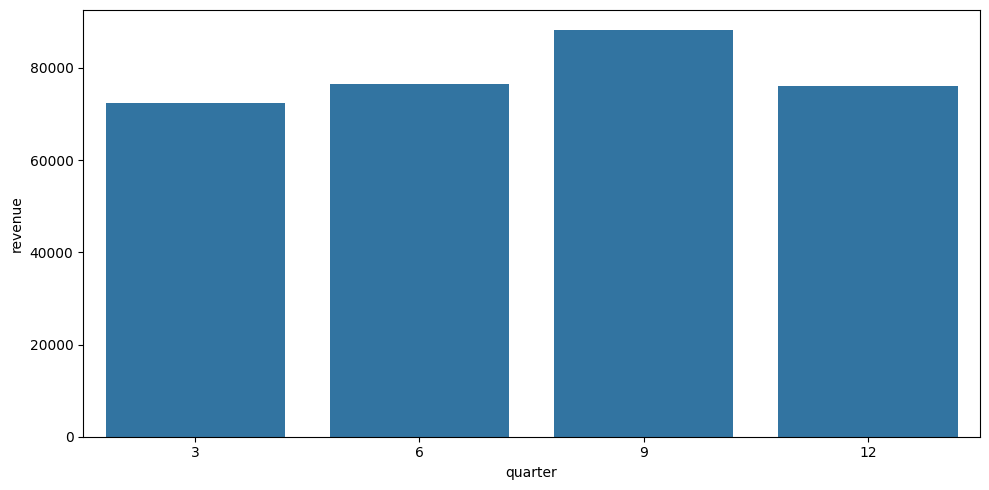

In [6]:
### Monthly gross benefit

fig, axis = plt.subplots(figsize=(10, 5))

tesla_qrev_monthly = tesla_qrev.groupby(tesla_qrev['quarter'].dt.month).sum().reset_index()

sns.barplot(data=tesla_qrev_monthly, x='quarter', y='revenue')

plt.tight_layout()

plt.show()

In [7]:
###########Creating SQL data base ######
con = sqlite3.connect("tesla_qrev.db")
cursor = con.cursor()

cursor.execute("""CREATE TABLE IF NOT EXISTS TESLA
    (quarter        DATE    NOT NULL,
     revenue         FLOAT       )""")

tesla_qrev.to_sql('TESLA', con, index = False, if_exists = 'replace') #converting DF to SQl

#Checking if table created properly

for row in cursor.execute("Select * FROM TESLA"):
    print(row)

con.commit()
con.close()

('2023-09-30 00:00:00', 23350)
('2023-06-30 00:00:00', 24927)
('2023-03-31 00:00:00', 23329)
('2022-12-31 00:00:00', 24318)
('2022-09-30 00:00:00', 21454)
('2022-06-30 00:00:00', 16934)
('2022-03-31 00:00:00', 18756)
('2021-12-31 00:00:00', 17719)
('2021-09-30 00:00:00', 13757)
('2021-06-30 00:00:00', 11958)
('2021-03-31 00:00:00', 10389)
('2020-12-31 00:00:00', 10744)
('2020-09-30 00:00:00', 8771)
('2020-06-30 00:00:00', 6036)
('2020-03-31 00:00:00', 5985)
('2019-12-31 00:00:00', 7384)
('2019-09-30 00:00:00', 6303)
('2019-06-30 00:00:00', 6350)
('2019-03-31 00:00:00', 4541)
('2018-12-31 00:00:00', 7226)
('2018-09-30 00:00:00', 6824)
('2018-06-30 00:00:00', 4002)
('2018-03-31 00:00:00', 3409)
('2017-12-31 00:00:00', 3288)
('2017-09-30 00:00:00', 2985)
('2017-06-30 00:00:00', 2790)
('2017-03-31 00:00:00', 2696)
('2016-12-31 00:00:00', 2285)
('2016-09-30 00:00:00', 2298)
('2016-06-30 00:00:00', 1270)
('2016-03-31 00:00:00', 1147)
('2015-12-31 00:00:00', 1214)
('2015-09-30 00:00:00', 937)